### EJERCICIO DE FINGER

#### Autor:Diego Peyrano / Padrón: 94254

##### CONSIGNA
Sobre el set de datos del TP, analizar la relación que existe entre la longitud de los tweets, y la veracidad de los mismos. Para esto se espera que analicen las longitudes de los distintos tweets, long máxima, mínima, promedio, y si existe alguna relación entre estos valores y el target (que indica si la información provista en el tweet es real o no).
Realizar una visualización que permita comunicar los resultados del punto 1.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

### Limpieza de datos

In [3]:
df_train = pd.read_csv("datos/train.csv")
df_train.keyword = df_train["keyword"].fillna("N/A")
df_train.location = df_train["location"].fillna("N/A")
df_train.text = df_train["text"].fillna("N/A")

print("Valores nulos sobre la columna Keyword sobre total ", str(len(df_train[df_train.keyword == "N/A"])), " / ", str(len(df_train)))
print("Valores nulos sobre la columna Location sobre total ", str(len(df_train[df_train.location == "N/A"])), " / ", str(len(df_train)))
print("Valores nulos sobre la columna Text sobre total ", str(len(df_train[df_train.text == "N/A"])), " / ", str(len(df_train)))

Valores nulos sobre la columna Keyword sobre total  61  /  7613
Valores nulos sobre la columna Location sobre total  2533  /  7613
Valores nulos sobre la columna Text sobre total  0  /  7613


### Procesamiento de los datos de longitud de texto  y target

In [4]:
#Agrego una columna con la longitud de los textos de los tweets
df_train['long_text'] = df_train['text'].map(lambda x: len(x))

longitud_maxima = max(df_train['long_text'])
longitud_minima = min(df_train['long_text'])
longitud_promedio = df_train['long_text'].mean()
print("=====================================================================")
print("La longitud máxima de un tweet tiene:", longitud_maxima)
print("La longitud mínima de un tweet tiene:", longitud_minima)
print("La longitud promedio entonces es:", longitud_promedio)
print("=====================================================================")

#Groupby por target y agrego los valores estadísticos
table = df_train.groupby('target')\
    .agg({'long_text':['mean','sum','max','min','count', 'std']})

print(table.stack())
print("=====================================================================")

#Reset de los index
dat = table['long_text'].reset_index()
print(dat)
print("=====================================================================")

La longitud máxima de un tweet tiene: 157
La longitud mínima de un tweet tiene: 7
La longitud promedio entonces es: 101.1616970970708
                  long_text
target                     
0      mean       95.832105
       sum    416103.000000
       max       157.000000
       min         7.000000
       count    4342.000000
       std        35.969652
1      mean      108.236319
       sum    354041.000000
       max       151.000000
       min        14.000000
       count    3271.000000
       std        29.369513
   target        mean     sum  max  min  count        std
0       0   95.832105  416103  157    7   4342  35.969652
1       1  108.236319  354041  151   14   3271  29.369513


### Cantidad de comprobados vs Sin comprobar

Para observar la diferencia entre ambos valores antes de continuar

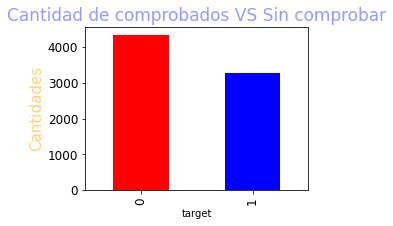

In [5]:
 #Cantidad de comprobados VS Sin comprobar
colors = ['red','blue']
v = dat.plot(kind='bar', x='target', y='count', figsize=(4,3), fontsize=12, legend=False, alpha = 1, color = colors)
v.set_title("Cantidad de comprobados VS Sin comprobar", fontsize=17, color = 'blue',alpha = 0.4)
v.set_ylabel("Cantidades", fontsize=15, color = 'orange', alpha = 0.5)
plt.show()

### BOXPLOT - Comparo las variaciones con respecto a la media

Text(0.5, 0, 'Targets')

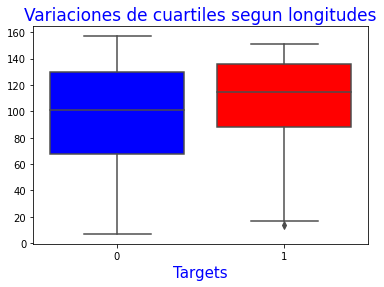

In [6]:
#Preparo los datos para graficar con boxplot de seaborn
data_1  = (df_train[df_train['target'] == 0]).reset_index()\
                .drop(['index'],axis=1)
data_2  = (df_train[df_train['target'] == 1]).reset_index()\
                .drop(['index'],axis=1)

datos_graf = [data_1['long_text'], data_2['long_text']]
plt.figure(figsize = (6, 4))

#Paleta de colores
colors = ['blue', 'red']

#Realizo el gráfico
v = sns.boxplot(data=datos_graf, saturation=1, palette = colors)
v.set_title("Variaciones de cuartiles segun longitudes", fontsize=17, color = 'blue',alpha = 1)
v.set_xlabel("Targets", fontsize=15, color = 'blue', alpha = 1) 

### Swarmplot - Comparo como se dispersan junto a sus valores atípicos

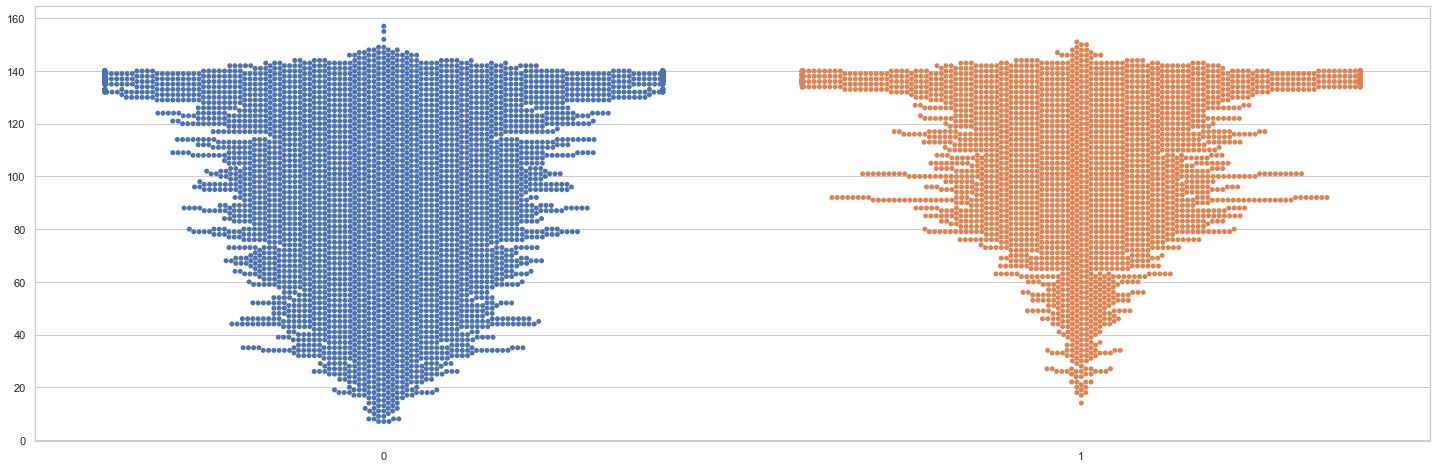

In [7]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize = (25, 8))
ax = sns.swarmplot(data=datos_graf)

### RESULTADO FINAL - Combinacion Swarmplot y Boxplot

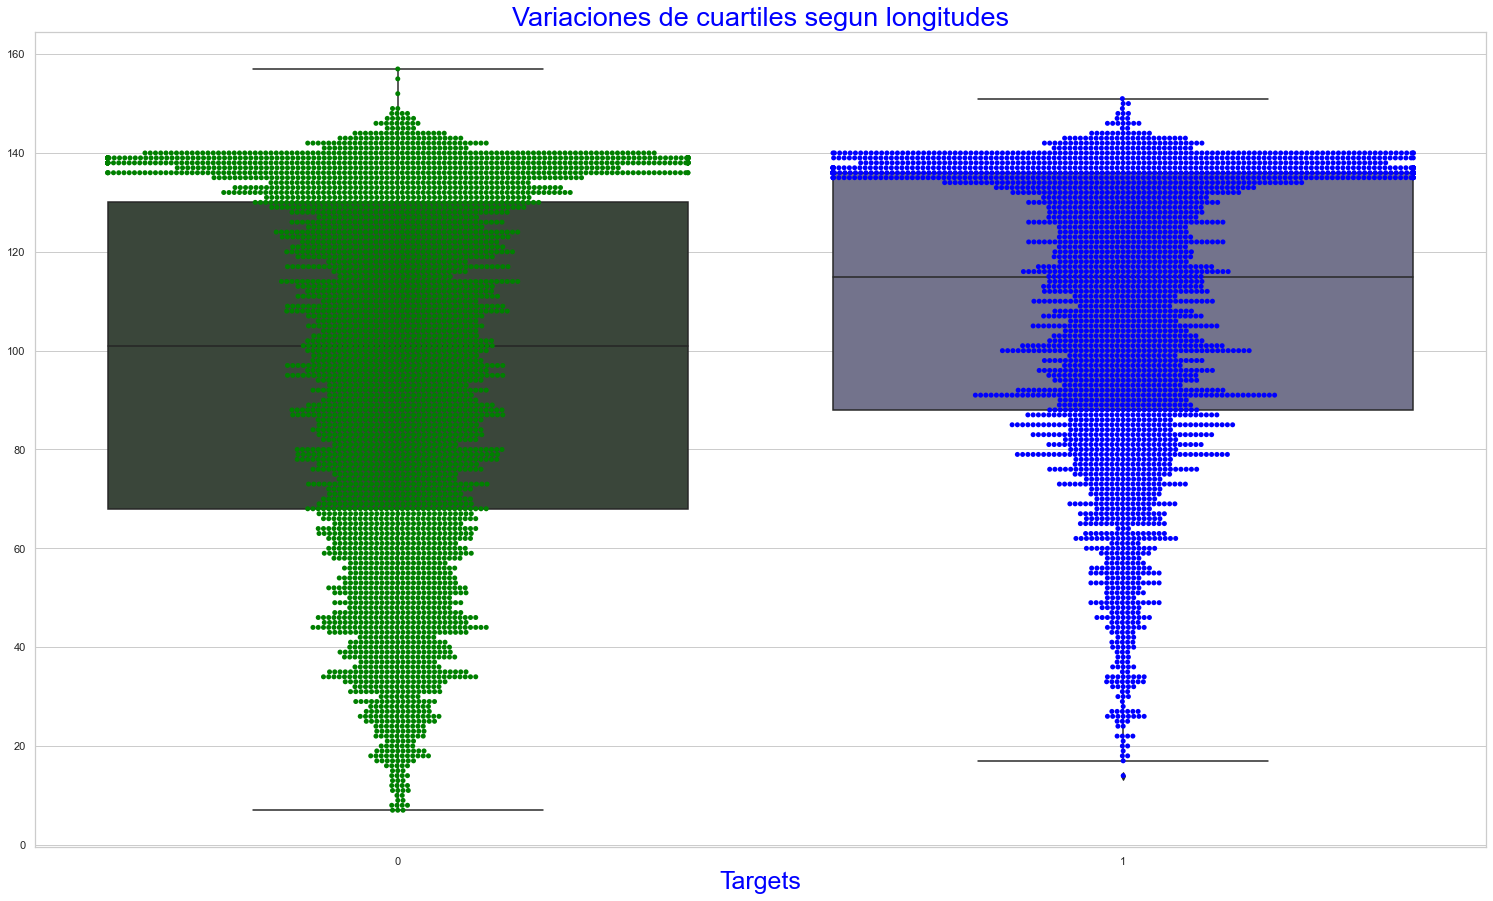

In [8]:
#Combino los dos graficos anteriores
plt.figure(figsize = (26, 15))
x_pos = 0.5
y_pos = 3
colors = ['green', 'blue']
#Agrego textos adicionales para detallar el plot
#plt.text(x_pos, y_pos, "text on plot")

v = sns.boxplot(data=datos_graf, saturation=0.1, palette = colors)
v = sns.swarmplot(data=datos_graf, palette = colors)
v.set_title("Variaciones de cuartiles segun longitudes", fontsize=27, color = 'blue',alpha = 1)
v.set_xlabel("Targets", fontsize=25, color = 'blue', alpha = 1) 

#Guardar archivo png
plt.savefig("out.png")